In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats



cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:16<00:00, 36.1MB/s]
100% 1.06G/1.06G [00:16<00:00, 70.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# Generators
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,

    batch_size=32,
    image_size=(256, 256),

)

test_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the array
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [7]:
# Create a CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding = 'valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding = 'valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding = 'valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [8]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 69s 96ms/step - loss: 0.6241 - accuracy: 0.6461 - val_loss: 0.5424 - val_accuracy: 0.7298
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4923 - accuracy: 0.7619 - val_loss: 0.4613 - val_accuracy: 0.7822
Epoch 3/10
625/625 [==============================] - 59s 93ms/step - loss: 0.3840 - accuracy: 0.8232 - val_loss: 0.5129 - val_accuracy: 0.7838
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2609 - accuracy: 0.8881 - val_loss: 0.6049 - val_accuracy: 0.7838
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1574 - accuracy: 0.9366 - val_loss: 0.8503 - val_accuracy: 0.7822
Epoch 6/10
625/625 [==============================] - 61s 96ms/step - loss: 0.0991 - accuracy: 0.9627 - val_loss: 0.9167 - val_accuracy: 0.7752
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0679 - accuracy: 0.9747 - val_loss: 0.9673 - val_accuracy

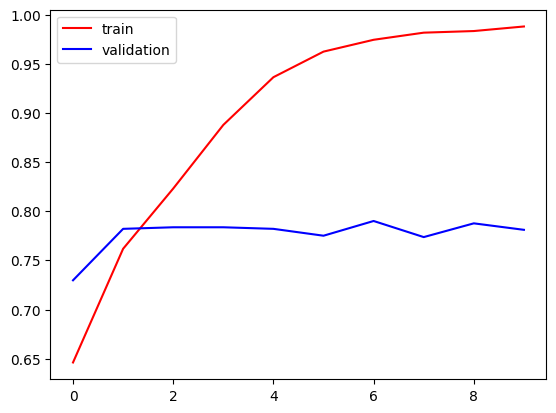

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

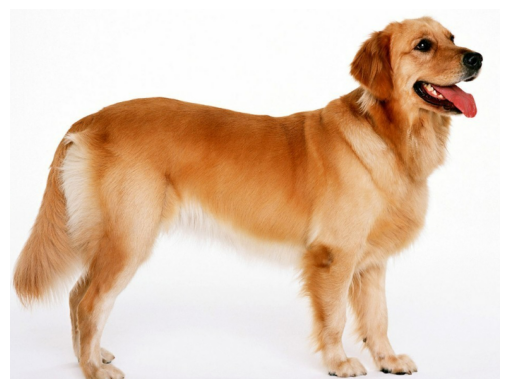

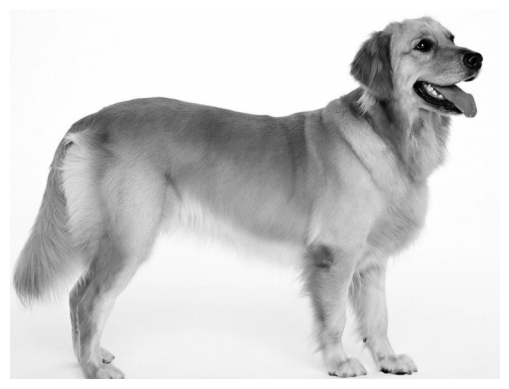

1/1 [==============================] - 0s 29ms/step
[[1.]]


In [16]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = '/content/Dog.png'
test_image = cv2.imread(image_path)

# Check if the image is loaded
if test_image is None:
    print(f"Failed to load image at {image_path}")
else:
    # Convert color from BGR to RGB for displaying
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.imshow(test_image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

    # Resize the image
    test_image_resized = cv2.resize(test_image, (256, 256))

    # Prepare the image for prediction
    test_input = test_image_resized.reshape(-1, 256, 256, 3)

    # Check if model is defined and predict
    try:
        test_pred = model.predict(test_input)
        print(test_pred)
    except NameError:
        print("Model is not defined. Please load the model before predicting.")
